In [1]:
# Import packages and set color schemes
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as integrate
import matplotlib.ticker as ticker

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"
myblack="#48494B"

font_size = 25
line_w=3

def openCfile(file):
    """
    Open the C txt file in order to obtain m_1 matrix of results 
    -----------
    Input
    -----------
    file: txt file
        m_1 file containing the results from the C simulation

    Return
    -----------
    mat: list of list
        m_1 matrix containing the results of the simulations 
    """
    with open(file) as f:
        cols = f.readlines() #columns in the txt file
    n_col = len(cols) #number of columns in the text file
    mat=[] # matrix 
    for i in range(n_col): # for each columns 
        elems_i=cols[i].split(" ") #split the elements using " "
        col_i=[] #create an empty column i 
        for elem in elems_i: #for each element of the list 
            if elem!="\n" and elem!=" ": #compare each elements and discard " " and "\n"
                col_i.append(float(elem)) #append elems that are floats to the vector of interest
        mat.append(col_i) #create the matrix
    mat=np.array(mat)
    return(mat) #return the value of the matrix.

# Figure 7: accuracy of the overdamped Langevin dynamics
## Figure 7 (b)
To produce the results, install openMP following the readme instructions and run the file: "Cfiles/accuracy_overdamped_a275.cpp"

use: g++ -o exec.exe accuracy_overdamped_a275.cpp -fopenmp

and run the notebook after running your code

If you don't want to run the C++ code, you can simply use the data which have been ran for the paper. I used $10^8$ samples. 

Note that to run the data for such a large number of samples would be very time consuming, so the C++ files are set with $10^5$ samples. The quality of the accuracy curves is therefore lower. 


In [2]:
#
# !!! MODIFY CODE HERE
#
run_own_code=False #Set this to true of you wish to generate your own results

In [3]:
# ###########################################
# ## Parameters to plot
# ###########################################
if run_own_code== True:
    path="./CFiles/data/overdamped_accuracy_a275"
else:
    path="./data_prerun/overdamped_accuracy_a275"


In [4]:
# Compute the true moments using scipy.integrate
a=  2.75
b=  0.1
x0= 0.5
c=  0.1
tau=0.1

def U(x):
    res = (a**1.5*b**0.5*x0*np.arctan((a/b)**0.5*(x-x0))+(a*b*(a*x0*(x-x0)-b))/(a*(x-x0)**2+b)+c*(x-x0)**2+2*c*(x-x0)*x0)*0.5
    return res
dtlist = np.array([np.exp(-4.5), np.exp(-4.21), np.exp(-3.93), np.exp(-3.64), np.exp(-3.36), np.exp(-3.07), np.exp(-2.79), np.exp(-2.5) , np.exp(-2.21), np.exp(-1.93), np.exp(-1.64), np.exp(-1.36), np.exp(-1.07), np.exp(-0.79), np.exp(-0.5)])
range_int=[-100,100] #raneg of integration
r0=range_int[0]
r1=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), r0,r1)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), r0,r1)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, r0,r1)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, r0,r1)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, r0,r1)[0],16)/norm

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


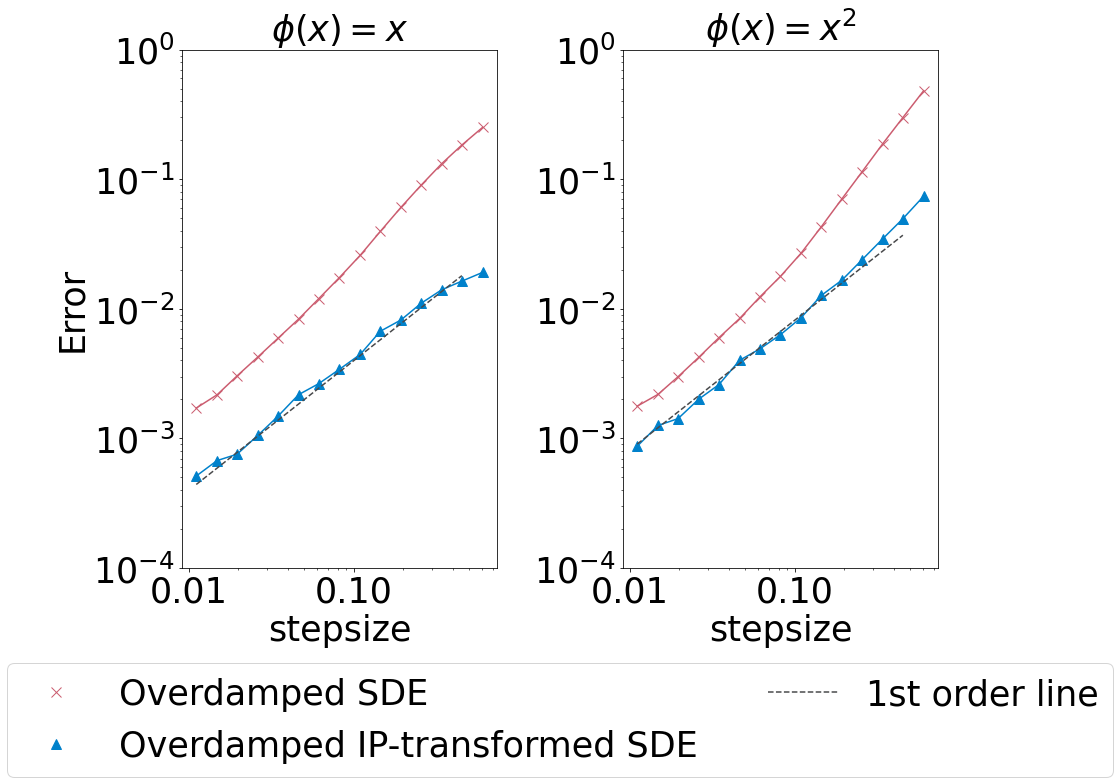

In [5]:
# from settings_and_potential_eddie import *
mksize=10
font_size=35
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 


# ###########################################
# ## Interpolate the slope
# ###########################################
dtlist = np.array([np.exp(-4.5), np.exp(-4.21), np.exp(-3.93), np.exp(-3.64), np.exp(-3.36), np.exp(-3.07), np.exp(-2.79), np.exp(-2.5) , np.exp(-2.21), np.exp(-1.93), np.exp(-1.64), np.exp(-1.36), np.exp(-1.07), np.exp(-0.79), np.exp(-0.5)])
xm=dtlist
# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(14,12))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.15,bottom=0.3, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

## no adaptive 
###############
lab="Overdamped SDE"

# Upload moments
mom1_list=np.hstack(openCfile(path+"/noada_moment1.txt"))
mom2_list=np.hstack(openCfile(path+"/noada_moment2.txt"))
# mom4_list=np.hstack(openCfile("data_a25/noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
# mom4_list=np.abs(mom4_list-true_mom_4)


#Plot moments
ax1.loglog(xm,(mom1_list),"x",markersize=mksize,color=myred,label=lab)
ax2.loglog(xm,(mom2_list),"x",markersize=mksize,color=myred,label=lab)
ax1.loglog(xm,(mom1_list),color=myred)
ax2.loglog(xm,(mom2_list),color=myred)


## Transformed 
###############
lab="Overdamped IP-transformed SDE"

# Upload moments
mom1_list=np.hstack(openCfile(path+"/tr_moment1.txt"))
mom2_list=np.hstack(openCfile(path+"/tr_moment2.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)

ax1.loglog(xm,(mom1_list),"^",markersize=mksize,color=myblue,label=lab)
ax2.loglog(xm,(mom2_list),"^",markersize=mksize,color=myblue,label=lab)
ax1.loglog(xm,(mom1_list),color=myblue)
ax2.loglog(xm,(mom2_list),color=myblue)



# ## mean value of G  
# ###############
lab="Overdamped"
g_mean=[]
j=0
for i in range(int(len(dtlist))):
    file_i=path+"/vec_gi="+str(i)+".txt"
    g_vals_i=np.hstack(openCfile(file_i))
    g_mean.append(np.mean(g_vals_i))

# ## Add the first order line 
lb=0
ub=-1 #len(dtlist)+1
x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c1 = np.linalg.lstsq(A, np.log10((mom1_list)[lb:ub]), rcond=None)[0]
ax1.loglog(dtlist[lb:ub], 10**(1*x + c1),"--",color=myblack,label="1st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c1 = np.linalg.lstsq(A, np.log10((mom2_list)[lb:ub]), rcond=None)[0]
ax2.loglog(dtlist[lb:ub], 10**(1*x + c1-0.1),"--",color=myblack) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax2.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

ax1.set_ylim([10**(-4),10**0]) #change to -7.5 for a=2.5
ax2.set_ylim([10**(-4),10**0]) #change to -7.5 for a=2.5

#label of y axis 
ax1.set_title("$\\phi(x)=x$",fontsize=font_size)
ax2.set_title("$\\phi(x)=x^2$",fontsize=font_size)

# label of y axis
ax1.set_ylabel("Error",fontsize=font_size)
# ax2.set_ylabel("Error",fontsize=font_size)
# ax3.set_ylabel("Error",fontsize=font_size)

# label of x axis
ax1.set_xlabel("stepsize",fontsize=font_size)
ax2.set_xlabel("stepsize",fontsize=font_size)

## G mean 
##########
ax1.legend(fontsize=font_size,ncol=2,loc="upper center",bbox_to_anchor=(1.2, -0.15))
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

path_save = "/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/"
fig.savefig(path_save+"moments_logplot_a275.eps",format="eps")
fig.savefig(path_save+"moments_logplot_a275.pdf",format="pdf")


## Figure 7 (b)

To produce the results, install openMP following the readme instructions to compile and execute the file: "Cfiles/accuracy_overdamped_a1.cpp"

use: g++ -o exec.exe accuracy_overdamped_a1.cpp -fopenmp

and run the notebook after running your code

If you don't want to run the C++ code, you can simply use the data which have been ran for the paper. I used $10^8$ samples. 

In [6]:
# ###########################################
# ## Set up the path
# ###########################################
if run_own_code== True:
    path="./CFiles/data/overdamped_accuracy_a1"
else:
    path="./data_prerun/overdamped_accuracy_a1"


In [7]:
# Compute true moment
a=  1.
b=  1.
x0= 0.5
c=  0.1
tau=0.1
def U(x):
    res = (a**1.5*b**0.5*x0*np.arctan((a/b)**0.5*(x-x0))+(a*b*(a*x0*(x-x0)-b))/(a*(x-x0)**2+b)+c*(x-x0)**2+2*c*(x-x0)*x0)*0.5
    return res

## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
range_int=[-100,100]
r0=range_int[0]
r1=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), r0,r1)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), r0,r1)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, r0,r1)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, r0,r1)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, r0,r1)[0],16)/norm

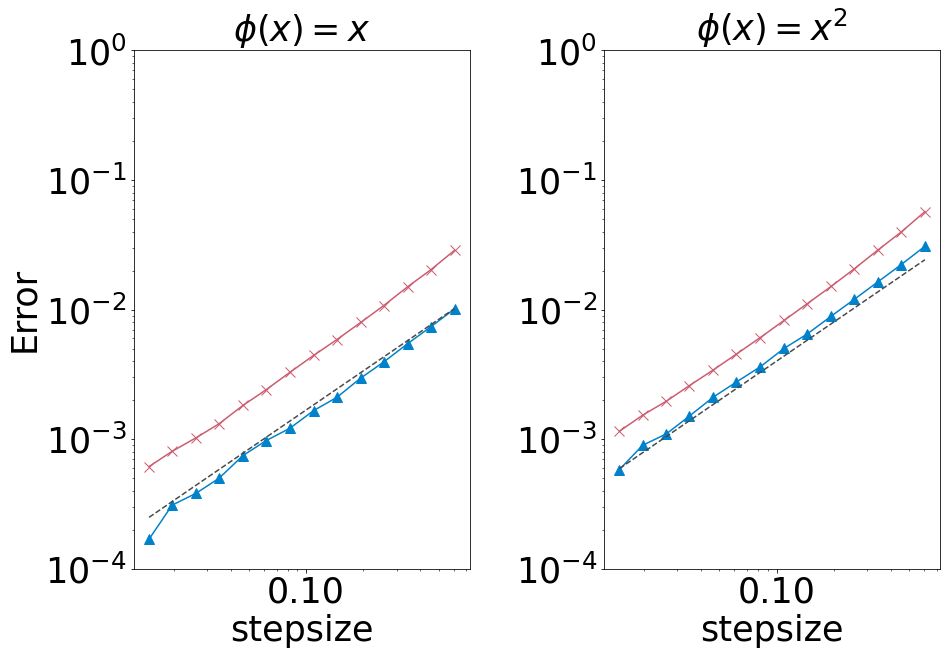

In [8]:
# ###########################################
# ## Parameters to plot
# ###########################################
lnb=1
unb=len(dtlist)
dtlist = np.array([np.exp(-4.5), np.exp(-4.21), np.exp(-3.93), np.exp(-3.64), np.exp(-3.36), np.exp(-3.07), np.exp(-2.79), np.exp(-2.5) , np.exp(-2.21), np.exp(-1.93), np.exp(-1.64), np.exp(-1.36), np.exp(-1.07), np.exp(-0.79), np.exp(-0.5)])[lnb:unb]
xm=dtlist

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(14,12))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.3, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

## no adaptive 
###############
lab="Overdamped SDE"

# Upload moments
mom1_list=np.hstack(openCfile(path+"/noada_moment1.txt"))[lnb:unb]
mom2_list=np.hstack(openCfile(path+"/noada_moment2.txt"))[lnb:unb]
# mom4_list=np.hstack(openCfile("data_a25/noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
# mom4_list=np.abs(mom4_list-true_mom_4)


#Plot moments
ax1.loglog(xm,(mom1_list),"x",markersize=mksize,color=myred,label=lab)
ax2.loglog(xm,(mom2_list),"x",markersize=mksize,color=myred,label=lab)
ax1.loglog(xm,(mom1_list),color=myred)
ax2.loglog(xm,(mom2_list),color=myred)


## Transformed 
###############
lab="Overdamped IP-transformed"

# Upload moments
mom1_list=np.hstack(openCfile(path+"/tr_moment1.txt"))[lnb:unb]
mom2_list=np.hstack(openCfile(path+"/tr_moment2.txt"))[lnb:unb]

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)

ax1.loglog(xm,(mom1_list),"^",markersize=mksize,color=myblue,label=lab)
ax2.loglog(xm,(mom2_list),"^",markersize=mksize,color=myblue,label=lab)
ax1.loglog(xm,(mom1_list),color=myblue)
ax2.loglog(xm,(mom2_list),color=myblue)



# ## Add the first order line 
lb=0
ub=len(dtlist) #len(dtlist)+1
x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom1_list)[lb:ub]), rcond=None)[0]
ax1.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom2_list)[lb:ub]), rcond=None)[0]
ax2.loglog(dtlist[lb:ub], 10**(1*x + c-0.1),"--",color=myblack) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax2.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

ax1.set_ylim([10**(-4),10**0]) #change to -7.5 for a=2.5
ax2.set_ylim([10**(-4),10**0]) #change to -7.5 for a=2.5

#label of y axis 
ax1.set_title("$\\phi(x)=x$",fontsize=font_size)
ax2.set_title("$\\phi(x)=x^2$",fontsize=font_size)

# label of y axis
ax1.set_ylabel("Error",fontsize=font_size)


# label of x axis
ax1.set_xlabel("stepsize",fontsize=font_size)
ax2.set_xlabel("stepsize",fontsize=font_size)

## G mean 
##########
# ax1.legend(fontsize=font_size,ncol=4,loc="upper center",bbox_to_anchor=(1.1, -0.15))
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

# fig.savefig("figures/moments_logplot_a275.eps")
path_save = "/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/"
fig.savefig(path_save+"moments_logplot_a1.eps",format="eps")
fig.savefig(path_save+"moments_logplot_a1.pdf",format="pdf")


# Figure 8: accuracy of the underdamped Langevin dynamics

To produce the results, install openMP following the readme instructions and run the file: "Cfiles/underdamped_baoab.cpp"

use: g++ -o exec.exe underdamped_baoab.cpp -fopenmp

and run the notebook after running your code

If you don't want to run the C++ code, you can simply use the data which have been ran for the paper. I used $10^6$ samples. 

Note that to run the data for such a large number of samples would be very time consuming, so the C++ files are set with $10^3$ samples. The quality of the accuracy curves is therefore lower. 


In [9]:
# ###########################################
# ## Set up the path
# ###########################################
if run_own_code== True:
    path="./CFiles/data/underdamped_accuracy_baoab"
else:
    path="./data_prerun/underdamped_accuracy_baoab"

In [10]:

## Modified harmonic potential
a=2.75
b=0.1
x0=0.5
c=0.1
tau=1
def U(x):
    res = (a**1.5*b**0.5*x0*np.arctan((a/b)**0.5*(x-x0))+(a*b*(a*x0*(x-x0)-b))/(a*(x-x0)**2+b)+c*(x-x0)**2+2*c*(x-x0)*x0)*0.5
    return res

## RANGE

range_int=[-200,200]
r0=range_int[0]
r1=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), r0,r1)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), r0,r1,epsabs=10**(-12))[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, r0,r1,epsabs=10**(-12))[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, r0,r1,epsabs=10**(-12))[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, r0,r1,epsabs=10**(-12))[0],16)/norm
print(true_mom_1)
print(true_mom_2)
print(true_mom_3)
print(true_mom_4)

-1.1948913256570037
9.378370872234388
-24.23344425495268
281.0907309920282


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


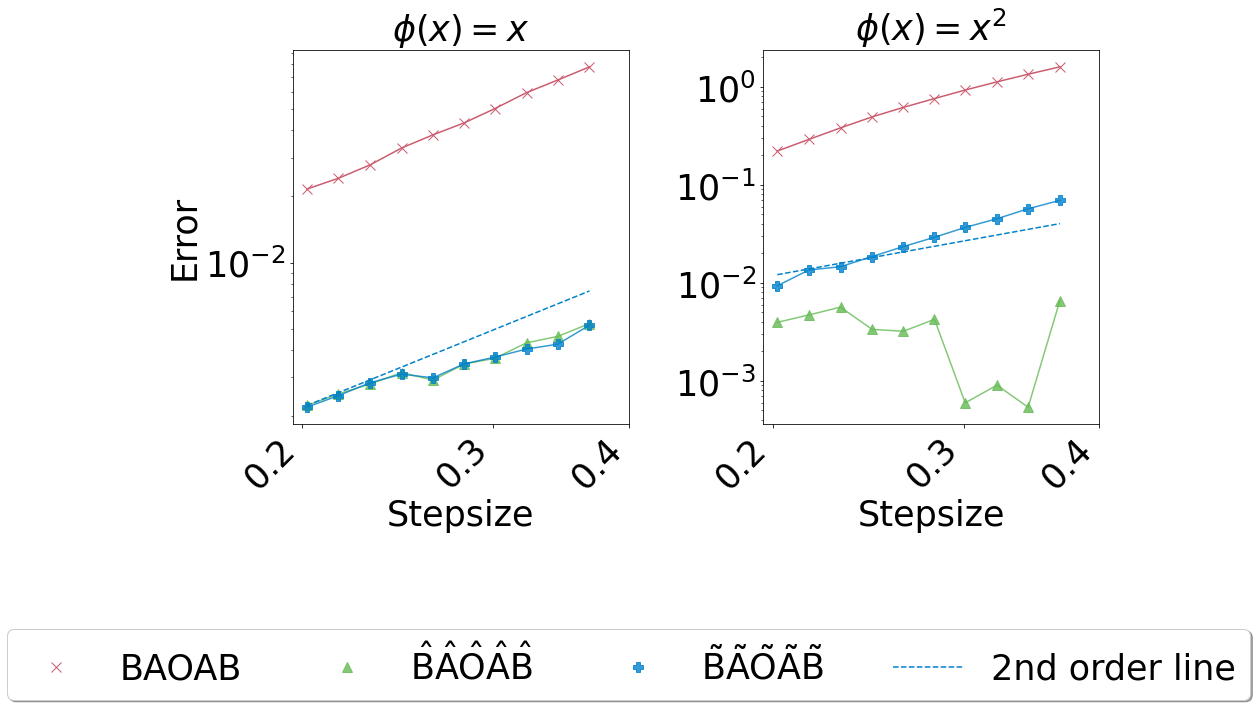

In [11]:
mksize=10
# ###########################################
# ## Parameters to plot
# ###########################################
unb=10
xm=np.array([0.202,.216,0.231,0.247,0.264,0.282,0.301,0.322,0.344,0.368])
dtlist=xm

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(14,8))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.25, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('x:.2f'))
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

# fig.suptitle("Underdamped with spring potential with burn in=5000, Nt=60 000 (every 100 value) and Ns 107 independantes trajectories",fontsize=font_size)
## no adaptive 
###############
lab="BAOAB"

# Upload moments
mom1_list=np.hstack(openCfile(path+"/noada_moment1.txt"))[0:unb]
mom2_list=np.hstack(openCfile(path+"/noada_moment2.txt"))[0:unb]


mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)


#Plot moments
ax1.loglog(xm,(mom1_list),"x",markersize=mksize,color=myred,label=lab)
ax2.loglog(xm,(mom2_list),"x",markersize=mksize,color=myred,label=lab)

ax1.loglog(xm,(mom1_list),color=myred)
ax2.loglog(xm,(mom2_list),color=myred)

ax1.legend(fontsize=font_size,ncol=4,loc="upper center",bbox_to_anchor=(1, -0.15))


## Transformed correction in B 
################################

# lab="$\\hat{\\rm{B}}\\hat{\\rm{A}}\\rm{O}\\hat{\\rm{A}}\\hat{\\rm{B}}$"
lab="$\hat{\\rm{B}}\\hat{\\rm{A}}\\hat{\\rm{O}}\\hat{\\rm{A}}\\hat{\\rm{B}}$"

mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path+"/tr_moment1B.txt"))[0:unb]
mom2_list=np.hstack(openCfile(path+"/tr_moment2B.txt"))[0:unb]

gvals=np.hstack(openCfile(path+"/vec_g_B.txt"))[0:-3]

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)

ax1.loglog(xm,(mom1_list),"^",markersize=mksize,color=mygreen,alpha=0.8,label=lab)
ax2.loglog(xm,(mom2_list),"^",markersize=mksize,color=mygreen,alpha=0.8,label=lab)

ax1.loglog(xm,(mom1_list),color=mygreen,alpha=0.8)
ax2.loglog(xm,(mom2_list),color=mygreen,alpha=0.8)


# ## Transformed correction in O 
# ################################

# lab="$\\hat{\\rm{B}}\\hat{\\rm{A}}\\rm{O}\\hat{\\rm{A}}\\hat{\\rm{B}}$"
lab = "$\\tilde{\\rm{B}}\\tilde{\\rm{A}}\\tilde{\\rm{O}}\\tilde{\\rm{A}}\\tilde{\\rm{B}}$"
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path+"/tr_moment1O.txt"))[0:unb]
mom2_list=np.hstack(openCfile(path+"/tr_moment2O.txt"))[0:unb]

gvals=np.hstack(openCfile(path+"/vec_g_O.txt"))[0:-3]

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)

ax1.loglog(xm,(mom1_list),"P",markersize=mksize,color=myblue,alpha=0.8,label=lab)
ax2.loglog(xm,(mom2_list),"P",markersize=mksize,color=myblue,alpha=0.8,label=lab)

ax1.loglog(xm,(mom1_list),color=myblue,alpha=0.8)
ax2.loglog(xm,(mom2_list),color=myblue,alpha=0.8)


# ###########################################################
# ## SECOND ORDER LINE 
# ###########################################################
lb=0
ub=len(dtlist) #len(dtlist)+1
x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom1_list)[lb:ub]), rcond=None)[0]
# ax1.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
ax1.loglog(dtlist[lb:ub], 10**(2*x + c+0.5),"--",color=myblue,label="2nd order line")

x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom2_list)[lb:ub]), rcond=None)[0]
ax2.loglog(dtlist[lb:ub], 10**(2*x + c-0.8),"--",color=myblue) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax2.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),

# #label of ]y axis 
ax1.set_title("$\\phi(x)=x$",fontsize=font_size)
ax2.set_title("$\\phi(x)=x^2$",fontsize=font_size)

# label of y axis
ax1.set_ylabel("Error",fontsize=font_size)

#label of x axis
ax1.set_xlabel("Stepsize",fontsize=font_size)
ax2.set_xlabel("Stepsize",fontsize=font_size)


ax1.legend(loc='upper center', bbox_to_anchor=(1., -0.5),fontsize=font_size,
          fancybox=True, shadow=True, ncol=4)


labels=(["0.2","0.3","0.4"])
ax1.set_xticks([0.2,.3,0.4])
ax1.set_xticklabels(labels,rotation=45,ha="right")

ax2.set_xticks([0.2,.3,0.4])
ax2.set_xticklabels(labels,rotation=45,ha="right")

path_save = "/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/"

fig.savefig(path_save+"moments_logplot_underdamped_a275.eps",format="eps")
fig.savefig(path_save+"moments_logplot_underdamped_a275.pdf",format="pdf")


# Figure 9 

To produce the results, install openMP following the readme instructions to compile and execute the file: 
- for the results on the ABOBA method, run: "Cfiles/underdamped_aboba.cpp"
- for the results on the OBABO method, run: "Cfiles/underdamped_spv.cpp"
- for the results on the SPV method, run: "Cfiles/underdamped_obabo.cpp"

use: g++ -o exec.exe filename.cpp -fopenmp

and run the notebook after running your code

If you don't want to run the C++ code, you can simply use the data which have been ran for the paper. I used $10^8$ samples. 

In [12]:
# ###########################################
# ## Set up the path
# ###########################################
if run_own_code== True:
    path_obabo="./CFiles/data/underdamped_accuracy_obabo/"
    path_aboba="./CFiles/data/underdamped_accuracy_aboba/"
    path_spv="./CFiles/data/underdamped_accuracy_spv/"

else:
    path_obabo="./data_prerun/underdamped_accuracy_obabo/"
    path_aboba="./data_prerun/underdamped_accuracy_aboba/"
    path_spv="./data_prerun/underdamped_accuracy_spv/"


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


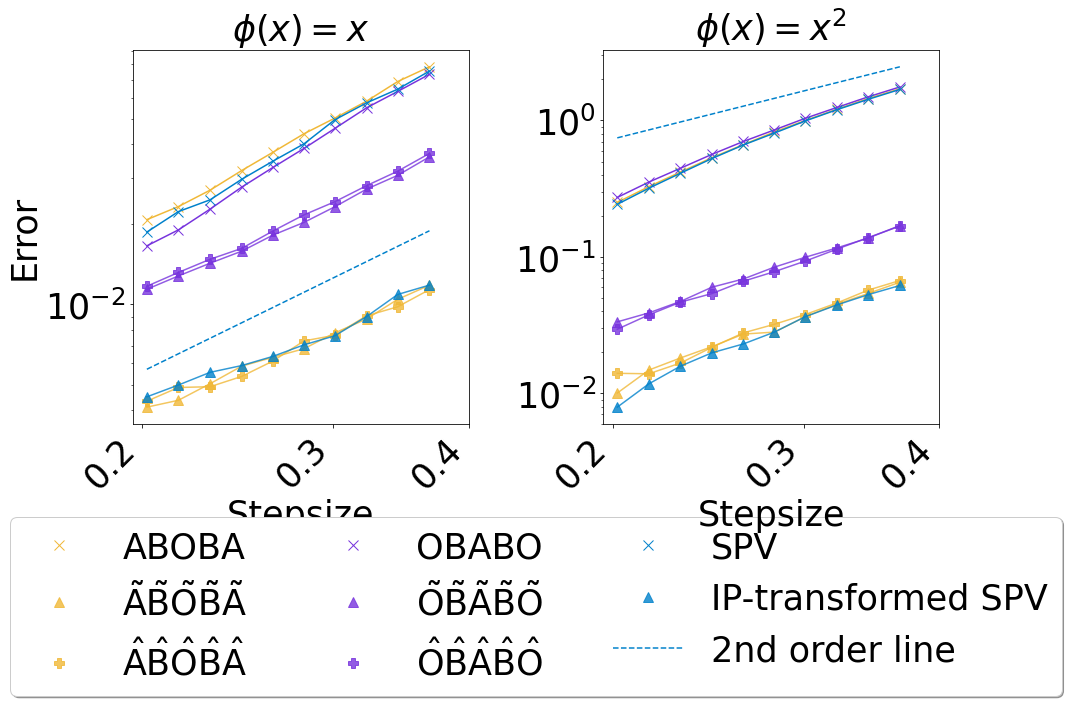

In [13]:
mksize=10
# ###########################################
# ## Set up parameters
# ###########################################
unb=10
xm=np.array([0.202,.216,0.231,0.247,0.264,0.282,0.301,0.322,0.344,0.368])
dtlist=xm

colorobabo=mymagenta
coloraboba=myyellow
colorspv=myblue

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(14,10))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.38, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('x:.2f'))
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

# ###########################################
# ## ABOBA
# ###########################################
path1=path_aboba 
## no adaptive 
###############
lab="ABOBA"
labB = "$\\tilde{\\rm{A}}\\tilde{\\rm{B}}\\tilde{\\rm{O}}\\tilde{\\rm{B}}\\tilde{\\rm{A}}$"
labO="$\hat{\\rm{A}}\\hat{\\rm{B}}\\hat{\\rm{O}}\\hat{\\rm{B}}\\hat{\\rm{A}}$"
colorsch=coloraboba
# Upload moments
mom1_list=np.hstack(openCfile(path1+"noada_moment1.txt"))[0:unb]
mom2_list=np.hstack(openCfile(path1+"noada_moment2.txt"))[0:unb]
mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
#Plot moments
ax1.loglog(xm,(mom1_list),"x",markersize=mksize,color=colorsch,label=lab)
ax2.loglog(xm,(mom2_list),"x",markersize=mksize,color=colorsch,label=lab)
ax1.loglog(xm,(mom1_list),color=colorsch)
ax2.loglog(xm,(mom2_list),color=colorsch)
ax1.legend(fontsize=font_size,ncol=4,loc="upper center",bbox_to_anchor=(1, -0.15))


## Transformed correction in B 
################################
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))
# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1B.txt"))[0:unb]
mom2_list=np.hstack(openCfile(path1+"tr_moment2B.txt"))[0:unb]
gvals=np.hstack(openCfile(path1+"vec_g_B.txt"))[0:-3]
mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
ax1.loglog(xm,(mom1_list),"^",markersize=mksize,color=colorsch,alpha=0.8,label=labB)
ax2.loglog(xm,(mom2_list),"^",markersize=mksize,color=colorsch,alpha=0.8,label=labB)
ax1.loglog(xm,(mom1_list),color=colorsch,alpha=0.8)
ax2.loglog(xm,(mom2_list),color=colorsch,alpha=0.8)


# ## Transformed correction in O 
# ################################
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))
# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1O.txt"))[0:unb]
mom2_list=np.hstack(openCfile(path1+"tr_moment2O.txt"))[0:unb]
gvals=np.hstack(openCfile(path1+"vec_g_O.txt"))[0:-3]
mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
ax1.loglog(xm,(mom1_list),"P",markersize=mksize,color=colorsch,alpha=0.8,label=labO)
ax2.loglog(xm,(mom2_list),"P",markersize=mksize,color=colorsch,alpha=0.8,label=labO)
ax1.loglog(xm,(mom1_list),color=colorsch,alpha=0.8)
ax2.loglog(xm,(mom2_list),color=colorsch,alpha=0.8)


# ###########################################
# ## OBABO
# ###########################################
path1=path_obabo
## no adaptive 
###############
lab="OBABO"
labB = "$\\tilde{\\rm{O}}\\tilde{\\rm{B}}\\tilde{\\rm{A}}\\tilde{\\rm{B}}\\tilde{\\rm{O}}$"
labO="$\hat{\\rm{O}}\\hat{\\rm{B}}\\hat{\\rm{A}}\\hat{\\rm{B}}\\hat{\\rm{O}}$"
colorsch=colorobabo
# Upload moments
mom1_list=np.hstack(openCfile(path1+"noada_moment1.txt"))[0:unb]
mom2_list=np.hstack(openCfile(path1+"noada_moment2.txt"))[0:unb]
mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
#Plot moments
ax1.loglog(xm,(mom1_list),"x",markersize=mksize,color=colorsch,label=lab)
ax2.loglog(xm,(mom2_list),"x",markersize=mksize,color=colorsch,label=lab)
ax1.loglog(xm,(mom1_list),color=colorsch)
ax2.loglog(xm,(mom2_list),color=colorsch)
ax1.legend(fontsize=font_size,ncol=4,loc="upper center",bbox_to_anchor=(1, -0.15))


## Transformed correction in B 
################################
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))
# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1B.txt"))[0:unb]
mom2_list=np.hstack(openCfile(path1+"tr_moment2B.txt"))[0:unb]
gvals=np.hstack(openCfile(path1+"vec_g_B.txt"))[0:-3]
mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
ax1.loglog(xm,(mom1_list),"^",markersize=mksize,color=colorsch,alpha=0.8,label=labB)
ax2.loglog(xm,(mom2_list),"^",markersize=mksize,color=colorsch,alpha=0.8,label=labB)
ax1.loglog(xm,(mom1_list),color=colorsch,alpha=0.8)
ax2.loglog(xm,(mom2_list),color=colorsch,alpha=0.8)


# ## Transformed correction in O 
# ################################
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))
# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1O.txt"))[0:unb]
mom2_list=np.hstack(openCfile(path1+"tr_moment2O.txt"))[0:unb]
gvals=np.hstack(openCfile(path1+"vec_g_O.txt"))[0:-3]
mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
ax1.loglog(xm,(mom1_list),"P",markersize=mksize,color=colorobabo,alpha=0.8,label=labO)
ax2.loglog(xm,(mom2_list),"P",markersize=mksize,color=colorsch,alpha=0.8,label=labO)
ax1.loglog(xm,(mom1_list),color=colorsch,alpha=0.8)
ax2.loglog(xm,(mom2_list),color=colorsch,alpha=0.8)

# ###########################################
# ## SPV
# ###########################################
path1=path_spv

## no adaptive 
###############
lab="SPV"
labB = "IP-transformed SPV"
colorsch=colorspv
# Upload moments
mom1_list=np.hstack(openCfile(path1+"noada_moment1.txt"))[0:unb]
mom2_list=np.hstack(openCfile(path1+"noada_moment2.txt"))[0:unb]
mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
#Plot moments
ax1.loglog(xm,(mom1_list),"x",markersize=mksize,color=colorsch,label=lab)
ax2.loglog(xm,(mom2_list),"x",markersize=mksize,color=colorsch,label=lab)
ax1.loglog(xm,(mom1_list),color=colorsch)
ax2.loglog(xm,(mom2_list),color=colorsch)
ax1.legend(fontsize=font_size,ncol=4,loc="upper center",bbox_to_anchor=(1, -0.15))

## Transformed correction in B 
################################
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))
# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1B.txt"))[0:unb]
mom2_list=np.hstack(openCfile(path1+"tr_moment2B.txt"))[0:unb]
gvals=np.hstack(openCfile(path1+"vec_g_B.txt"))[0:-3]
mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
ax1.loglog(xm,(mom1_list),"^",markersize=mksize,color=colorsch,alpha=0.8,label=labB)
ax2.loglog(xm,(mom2_list),"^",markersize=mksize,color=colorsch,alpha=0.8,label=labB)
ax1.loglog(xm,(mom1_list),color=colorsch,alpha=0.8)
ax2.loglog(xm,(mom2_list),color=colorsch,alpha=0.8)



# ###########################################################
# ## SECOND ORDER LINE 
# ###########################################################
lb=0
ub=len(dtlist) #len(dtlist)+1
x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom1_list)[lb:ub]), rcond=None)[0]
# ax1.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
ax1.loglog(dtlist[lb:ub], 10**(2*x + c+0.4),"--",color=myblue,label="2nd order line")

x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom2_list)[lb:ub]), rcond=None)[0]
ax2.loglog(dtlist[lb:ub], 10**(2*x + c+1),"--",color=myblue) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax2.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),

# #label of ]y axis 
ax1.set_title("$\\phi(x)=x$",fontsize=font_size)
ax2.set_title("$\\phi(x)=x^2$",fontsize=font_size)

# label of y axis
ax1.set_ylabel("Error",fontsize=font_size)

#label of x axis
ax1.set_xlabel("Stepsize",fontsize=font_size)
ax2.set_xlabel("Stepsize",fontsize=font_size)


ax1.legend(loc='upper center', bbox_to_anchor=(1.2, -0.2),fontsize=font_size,
          fancybox=True, shadow=True, ncol=3)


labels=(["0.2","0.3","0.4"])
ax1.set_xticks([0.2,.3,0.4])
ax1.set_xticklabels(labels,rotation=45,ha="right")

ax2.set_xticks([0.2,.3,0.4])
ax2.set_xticklabels(labels,rotation=45,ha="right")

path_save = "/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/"

fig.savefig(path_save+"moments_logplot_underdamped_allmethods.eps",format="eps")
fig.savefig(path_save+"moments_logplot_underdamped_allmethods.pdf",format="pdf")


# Figure 10

To produce the results, install openMP following the readme instructions to compile and execute the file: 
- for the results on the number of escaping trajectory method, run: "Cfiles/underdamped_bayesian.cpp"

use: g++ -o exec.exe underdamped_bayesian.cpp -fopenmp
and ./exec.exe

and run the notebook after running your code


In [14]:
# ###########################################
# ## Set up the path
# ###########################################
if run_own_code== True:
    path="./CFiles/data/bayesian_escaping/"

else:
    path="./data_prerun/bayesian_escaping/"


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


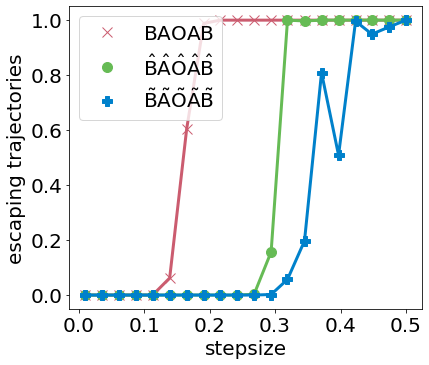

In [15]:
# #######################
# ## Set up parameters ## 
# #######################
mksize=10
font_size=20
xm=np.array([0.5  , 0.474, 0.448, 0.423, 0.397, 0.371, 0.345, 0.319, 0.294,
       0.268, 0.242, 0.216, 0.191, 0.165, 0.139, 0.113, 0.087, 0.062,
       0.036, 0.01])
n_trajectories=1000
# ###########################################
# ## Plot the number of escaping traj
# ###########################################
import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size)
fig, (ax1)= plt.subplots(1, 1,figsize=(7,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.2,
                        bottom=0.2, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
## no adaptive 
###############
lab="Underdamped"

# Upload moments
noada=np.hstack(openCfile(path+"noada_nescaping.txt"))/n_trajectories
methB=np.hstack(openCfile(path+"tr_B_nescaping.txt"))/n_trajectories
methO=np.hstack(openCfile(path+"tr_O_nescaping.txt"))/n_trajectories

# Plot with the appropriate label
labnoada= "$\\rm{B}\\rm{A}\\rm{O}\\rm{A}\\rm{B}$"
ax1.plot(xm,(noada),"x",markersize=mksize,color=myred,label=labnoada)
ax1.plot(xm,(noada),color=myred,linewidth=line_w)
labB= "$\\hat{\\rm{B}}\\hat{\\rm{A}}\\hat{\\rm{O}}\\hat{\\rm{A}}\\hat{\\rm{B}}$"
ax1.plot(xm,(methB),"o",markersize=mksize,color=mygreen,label=labB)
ax1.plot(xm,(methB),color=mygreen,linewidth=line_w)
labO="$\\tilde{\\rm{B}}\\tilde{\\rm{A}}\\tilde{\\rm{O}}\\tilde{\\rm{A}}\\tilde{\\rm{B}}$"
ax1.plot(xm,(methO),"P",markersize=mksize,color=myblue,label=labO)
ax1.plot(xm,(methO),color=myblue,linewidth=line_w)
ax1.set_xlabel("stepsize", fontsize=font_size)
ax1.set_ylabel("escaping trajectories", fontsize=font_size)
tick_spacing = 0.1
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.legend(loc = "upper left",fontsize=font_size)
plt.savefig('figures/bayesian_escaping.eps', format='eps')
plt.savefig('figures/bayesian_escaping.pdf', format='pdf')

# Figure 11 and 12

To produce the results, install openMP following the readme instructions to compile and execute the file: 
- run: "Cfiles/underdamped_2d_baoab.cpp"

use: g++ -o exec.exe underdamped_2d_baoab.cpp -fopenmp
and ./exec.exe

and run the notebook after running your code


In [16]:
# ###########################################
# ## Set up the path
# ###########################################
if run_own_code== True:
    path="./CFiles/data/underdamped_2d"

else:
    path="./data_prerun/underdamped_2d"

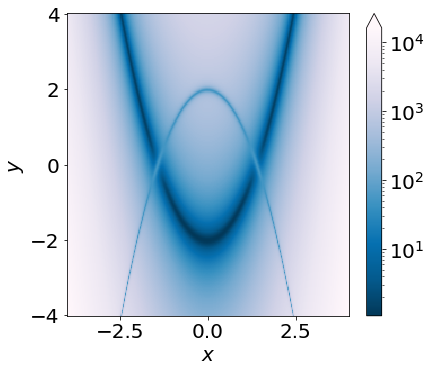

In [17]:
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
from mpl_toolkits import mplot3d
fig, (axs)= plt.subplots(1, 1,figsize=(7,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.2,bottom=0.2, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

font_size=20
######################
# DEFINE THE POTENTIAL
######################
## parameters
c=0
d=-3.61
def getp1(x,y):
    return (y-x*x+2)**2
def getp2(x,y):
    return (y+x*x-2)**2

def Utest2(x,y,k1,k2,k3,k4):
    p1=getp1(x,y)
    p2=getp2(x,y)
    res=(1+k1*p1*p2)/(1+k1*p1)+k3*(1+k2*p1*p2)/(1+k2*p2)+k4*x*x#+k5*((x-c)*(x-c)+(y-d)*(y-d))
    return res

####################
## True distribution
#####################
beta=1/0.1
nbins=250
bound=4
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound,bound,nbins)
X, Y = np.meshgrid(X, Y)
Z =Utest2(X,Y,0.1,50,50,0.1)

pcm = axs.pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                   cmap='PuBu_r', shading='auto')
axs.set_xlabel("$x$",fontsize=font_size)
axs.set_ylabel("$y$",fontsize=font_size)
fig.colorbar(pcm, ax=axs, extend='max')
fig.savefig("figures/2d_plot_bobsled.eps",format="eps")
fig.savefig("figures/2d_plot_bobsled.pdf",format="pdf")
fig.savefig("figures/bobsled_noada_ada_zoom_nolegend.png")

Define a function to read the data when the system has two dimensions

In [18]:
def openCfile_qp(file):
    with open(file) as f:
        cols = f.readlines() #columns in the txt file
    n_col = len(cols) #number of columns in the text file
    # when fill_p is 1, then fill in the matrix q
    fill_p=0
    fill_g=0
    # vector of res
    vals_q=[] #create an empty column i 
    vals_p=[] #create an empty column i
    vals_g=[] #create an empty column i  
    for i in range(n_col): # for each columns 
        if cols[i]=='q\n':
            fill_q=1
            i+=1
        if cols[i]=='p\n':
            fill_p=1
            fill_q=0
            i+=1
        if cols[i]=='g\n':
            fill_g=1
            fill_q=0
            fill_p=0
            i+=1
        # clean up the cols 
        elems_i=cols[i].split(" ") #split the elements using " "
        for elem in elems_i: #for each element of the list 
            if elem!="\n" and elem!=" ": #compare each elements and discard " " and "\n"
                if fill_q==1:
                    vals_q.append(float(elem)) #append elems that are floats to the vector of interest
                elif fill_p==1:
                    vals_p.append(float(elem))
                elif fill_g==1:
                    vals_g.append(float(elem))
    return np.array(vals_q),np.array(vals_p),np.array(vals_g)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


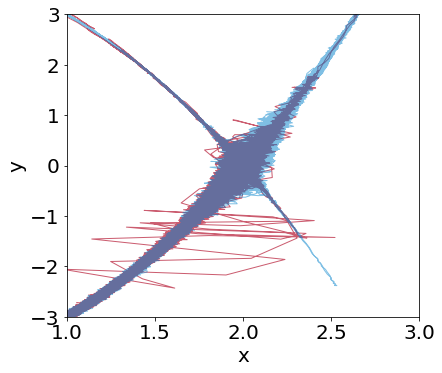

In [19]:
## Set up the path
path_smalldt=path+"/smalldt"

## set up plot parameters
fig, ((axs))= plt.subplots(1,1,figsize=(7,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.2,bottom=0.2, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=20

# i=0 (look at one traj only)
i=0
filename= path_smalldt+"/vec_noada_x"+str(i)+".txt"
q_noadax,p_noada,g=openCfile_qp(filename)
filename= path_smalldt+"/vec_tr_x"+str(i)+".txt"
q_trx,p_tr,g=openCfile_qp(filename)
filename= path_smalldt+"/vec_tr_g"+str(i)+".txt"
# g,p_trnone,gnone=openCfile_qp(filename)

filename= path_smalldt+"/vec_noada_y"+str(i)+".txt"
q_noaday,p_noada,g=openCfile_qp(filename)
filename= path_smalldt+"/vec_tr_y"+str(i)+".txt"
q_try,p_tr,g=openCfile_qp(filename)
filename= path_smalldt+"/vec_tr_g"+str(i)+".txt"
g,p_trnone,gnone=openCfile_qp(filename)

# Use the method with correction in step O
###
labO="$\\tilde{\\rm{B}}\\tilde{\\rm{A}}\\tilde{\\rm{O}}\\tilde{\\rm{A}}\\tilde{\\rm{B}}$"

lw=1.
axs.plot(q_noadax,q_noaday,linewidth=lw,label='BAOAB',alpha=1.,color=myred)
axs.plot(q_trx,q_try,markersize=1,linewidth=lw,alpha=0.5,label=labO,color=myblue)

axs.set_ylim(-3,3.)
axs.set_xlim(1,3)

axs.set_xlabel("x", fontsize=font_size)
axs.set_ylabel("y", fontsize=font_size)

fig.savefig("./figures/plot_syst_2d.eps",format="eps")
fig.savefig("./figures/plot_syst_2d.pdf",format="pdf")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


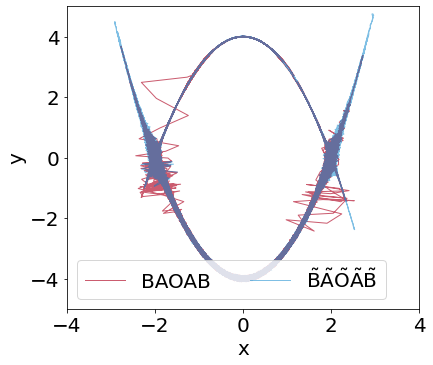

In [20]:
## Plot figures 
fig, ((axs))= plt.subplots(1,1,figsize=(7,6))
fig.subplots_adjust(left=0.2,bottom=0.2, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=20

# Q
###
nw=1
lw=1.
axs.plot(q_noadax[::nw],q_noaday[::nw],linewidth=lw,label='BAOAB',color=myred)
axs.plot(q_trx[::nw],q_try[::nw],markersize=1,linewidth=lw,alpha=0.5,label=labO,color=myblue)

axs.set_ylim(-5,5.)
axs.set_xlim(-4,4)

axs.set_xlabel("x", fontsize=font_size)
axs.set_ylabel("y", fontsize=font_size)

axs.legend(fontsize=font_size,ncol=2,loc="lower left")
fig.savefig("./figures/plot_syst_2d_large.eps",format="eps")
fig.savefig("./figures/plot_syst_2d_large.pdf",format="pdf")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


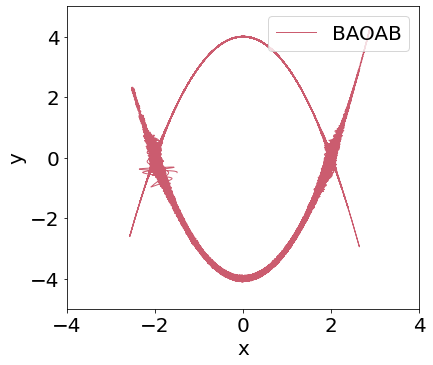

In [21]:
## Set up path
path_only_noada=path+"/justnoada"

## set up plot parameters
fig, ((axs))= plt.subplots(1,1,figsize=(7,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.2,bottom=0.2, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=20

# only look for one trajectory
filename= path_only_noada+"/vec_noada_x"+str(i)+".txt"
q_noadax,p_noada,g=openCfile_qp(filename)
filename= path_only_noada+"/vec_tr_x"+str(i)+".txt"
q_trx,p_tr,g=openCfile_qp(filename)
filename= path_only_noada+"/vec_tr_g"+str(i)+".txt"

filename= path_only_noada+"/vec_noada_y"+str(i)+".txt"
q_noaday,p_noada,g=openCfile_qp(filename)
filename= path_only_noada+"/vec_tr_y"+str(i)+".txt"
q_try,p_tr,g=openCfile_qp(filename)
filename= path_only_noada+"/vec_tr_g"+str(i)+".txt"
g,p_trnone,gnone=openCfile_qp(filename)

# Q
###
lw=1.
axs.plot(q_noadax,q_noaday,linewidth=lw,label='BAOAB',color=myred)

axs.set_ylim(-5,5.)
axs.set_xlim(-4,4)

axs.set_xlabel("x", fontsize=font_size)
axs.set_ylabel("y", fontsize=font_size)

axs.legend(fontsize=font_size,ncol=2,loc="upper right")

fig.savefig("./figures/plot_syst_2d_onlynoda.eps",format="eps")
fig.savefig("./figures/plot_syst_2d_onlynoda.pdf",format="pdf")
